# Integrated Project: Games 2017


<strong>Goal</strong>: to identify patterns that determine whether a game succeeds or not in order to spot potential big winners and plan advertising campaigns

### Table of Contents

* [STEP I: ANALYSIS OF GENERAL INFORMATION](#chapter1)
* [STEP II: PRERARATION OF DATA](#chapter2)
* [Step III: DEEP ANALYSIS OF DATA](#chapter3)
* [Step IV: USER PROFILE FOR EACH REGION](#chapter4)
* [Step V: TEST OF HYPETHESES](#chapter5)
* [Step VI: OVERALL CONCLUSION](#chapter6)

### <strong><a class="anchor" id="chapter1">STEP I: ANALYSIS OF GENERAL INFORMATION</a>
</strong>


In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st
import seaborn as sns

games = pd.read_csv("games.csv")
games.info()
display(games.head())
display(games.describe())
display(games.describe(include=['object']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

Name Platform   Genre User_Score Rating
count                         16713    16715   16713      10014   9949
unique                        11559       31      12         96      8
top     Need for Speed: Most Wanted      PS2  Action        tbd      E
freq                             12     2161    3369       2424   3990

In [2]:
print('The NaN statistics')
display(games.isnull().sum())
print('Number of duplicates: ', games.duplicated().sum(), '\n')

print('Occurrences count of value "tbd" in columns')
for column in games.columns:
    print(column, ':', len(games[games[column] == 'tbd']))


The NaN statistics


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Number of duplicates:  0 

Occurrences count of value "tbd" in columns
Name : 0
Platform : 0
Year_of_Release : 0
Genre : 0
NA_sales : 0
EU_sales : 0
JP_sales : 0
Other_sales : 0
Critic_Score : 0
User_Score : 2424
Rating : 0


C:\Users\jadir\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


### <strong>General information: major conclusions and commentaries.</strong>
<ol>
    <li>NaN values: the data contains NaN values in several columns
    <ol>
        <li><strong>Columns Name and Genre</strong>: there are 2 rows with NaN values almost in each column. I can drop the rows without any risk to lose any important data.</li>
        <li><strong>Year_or_release column</strong>: there are 269 NaN values (less than 2% of data). The NaN values can be replaced by 0 for further processing.</li>
        <li><strong>Critic_Score column</strong>: there are 8578 NaN values (51% of data). The column values are crucual for further analysis. I can try to find any correlations with other columns in order to find the way to fill in the missing value.</li>
        <li><strong>User_Score column</strong>: there are 6701 NaN values (40% of data). As well as in Critic_Score column I need to find the most appropriate way to fill in the missing values.</li>
        <li><strong>Rating column</strong>: there are 6766 NaN values (40% of data). The same as in the previous two columns</li>
        </ol>
    </li>
    <li>There are no explicit <strong>duplicates</strong>.</li>
    <li>TBD value in user_score column: there are 2424 <strong>TBD</strong> values (almost 15% of data) </li>
    <li> There are <strong>data types</strong> that should be changed:
        <ol>
            <li>Year_of_Release: float to int</li>
            <li>User_Score: string to float</li>
        </ol>
    </li>
    </ol>

### <a class="anchor" id="chapter2"><strong>STEP II: PRERARATION OF DATA</strong></a>


In [3]:
import math
# creating sales categories (1-20)
def sales_category(sales):
    if(sales<=0.1):
        return(1)
    elif(sales>0.1 and sales<2):
        return(math.ceil(sales*10))
    else:
        return(20)
    
def critic_score_category(critic_score):
    return(math.floor(critic_score/10))
               


In [4]:
# converting column names to lowercase 
games = games.rename(columns=str.lower)
#processing NaN values
games.fillna({'year_of_release':0, 'rating': 'missing'},inplace=True)
games['critic_score'] = games['critic_score'].fillna(0)
games['user_score'] = games['user_score'].fillna(0)
games = games.replace('tbd', np.nan)
games.dropna()

#changing data types
games['user_score'] = pd.to_numeric(games['user_score'], downcast='float')
games = games.astype({"year_of_release": int})

#adding columns total_sales and total_sales_category
games['total_sales'] = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

for i in games.index:
    games.loc[i, 'total_sales_category'] = sales_category(games.loc[i, 'total_sales'])
games = games.astype({"total_sales_category": int})



# trying to find correlations to fill the missiong values in user_score and critic_score
games_without_nan = games.query('user_score != 0 and critic_score != 0')
display(games_without_nan.corr())


year_of_release  na_sales  eu_sales  jp_sales  \
year_of_release              1.000000  0.010989  0.016911  0.023082   
na_sales                     0.010989  1.000000  0.840496  0.469161   
eu_sales                     0.016911  0.840496  1.000000  0.520526   
jp_sales                     0.023082  0.469161  0.520526  1.000000   
other_sales                  0.014584  0.728261  0.718238  0.396894   
critic_score                 0.011748  0.240416  0.220477  0.152461   
user_score                   0.006157  0.086496  0.055573  0.127103   
total_sales                  0.016706  0.955695  0.938912  0.613908   
total_sales_category         0.017541  0.579701  0.533030  0.346231   

                      other_sales  critic_score  user_score  total_sales  \
year_of_release          0.014584      0.011748    0.006157     0.016706   
na_sales                 0.728261      0.240416    0.086496     0.955695   
eu_sales                 0.718238      0.220477    0.055573     0.938912   
jp_sales                 0.396894      0.152461    0.127103     0.613908   
other_sales              1.000000      0.198649    0.057359     0.805625   
critic_score             0.198649      1.000000    0.580878     0.245225   
user_score               0.057359      0.580878    1.000000     0.088602   
total_sales              0.805625      0.245225    0.088602     1.000000   
total_sales_category     0.478485      0.401498    0.161509     0.588598   

                      total_sales_category  
year_of_release                   0.017541  
na_sales                          0.579701  
eu_sales                          0.533030  
jp_sales                          0.346231  
other_sales                       0.478485  
critic_score                      0.401498  
user_score                        0.161509  
total_sales                       0.588598  
total_sales_category              1.000000

<p>The major challenge in the current project is a high number of missing values in "critic_score" and "user_score" columns. There are no explicit correlations between critic_score and user_score and any other categories (accordint to corr() function). Therefore, the most appropriate approach is to leave the missing values (zero values) as it is.</p> 

<p>After adding  "total_sales" column I decided to create additional "total_sales_category" and "critic_score_category" column in order to find possible correlations bitween total sales and critic or user scores.</p>



<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:center; vertical-align: middle; padding:20px 0;">
    <b>Note:</b>In order to assign the total_sales cateogory (in range 0-9) the function sales_category(sales) is applied. In order to assign the critic_score_category  (in range 1-20) the function critic_score_category(critic_score) is applied.
</div>

<p>One may notice a light correlation between critic_score and total_score category (0.387982) and also between user_score and critic_score(0.580878)</p>

<p>In this connection, the final decision was to create additional columns (critic_score_upd and user_score_upd) and to keep the updated values in mind for further analysis</p>

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:center; vertical-align: middle; padding:20px 0;">
    <b>Note:</b>The missing values in critic_score_upd and user_score_upd were filled by median values according to total sales category(critic_score_upd) and to critic_score_category (user_score_upd) <b>See next code block:</b>
</div>

In [5]:
# creating critic_score_upd column
games['critic_score_upd'] = games['critic_score']
games['critic_score_upd']=games['critic_score_upd'].replace(0,games.groupby(['total_sales_category'])['critic_score_upd'].transform('median'))

for i in games.index:
    games.loc[i, 'critic_score_category'] = critic_score_category(games.loc[i, 'critic_score_upd'])



In [6]:
#creating user_score_upd column
games['user_score_upd']=games['user_score']
games['user_score_upd']=games['user_score_upd'].replace(0,games.groupby(['critic_score_category'])['user_score_upd'].transform('median'))

display(games.head())

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77           0.0         0.0  missing   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00           0.0         0.0  missing   

   total_sales  total_sales_category  critic_score_upd  critic_score_category  \
0        82.54                    20              76.0                    7.0   
1        40.24                    20              78.0                    7.0   
2        35.52                    20              82.0                    8.0   
3        32.77                    20              80.0                    8.0   
4        31.38                    20              78.0                    7.0   

   user_score_upd  
0             8.0  
1             7.3  
2             8.3  
3             8.0  
4             7.3

In [9]:
print('Number of missing critic_score value after transformation:', len(games.query('critic_score_upd == 0.0')))
print('Number of missing critic_score value before transformation:', len(games.query('critic_score == 0.0')))

print('Number of missing user_score value after transformation:', len(games.query('user_score_upd == 0')))
print('Number of missing user_score value before transformation:', len(games.query('user_score == 0.0')))
print('Number of missing rating value', len(games.query('rating == "missing"')))


missing_critic_score = games.query('critic_score == 0.0')
missing_critic_score_upd = games.query('critic_score_upd == 0.0')
missing_user_score = games.query('user_score == 0.0')
missing_user_score_upd = games.query('user_score_upd == 0.0')
missing_rating = games.query('rating == "missing"')
print('\n The number of critic score missing values according to total sales categories:')
print(missing_critic_score['total_sales_category'].value_counts())
print('\n The number of critic score missing values according to total sales categories after transformation:')
print(missing_critic_score_upd['total_sales_category'].value_counts())
print('\n The number of rating missing values according to total sales categories:')
print(missing_rating['total_sales_category'].value_counts())


Number of missing critic_score value after transformation: 5533
Number of missing critic_score value before transformation: 8578
Number of missing user_score value after transformation: 4849
Number of missing user_score value before transformation: 6702
Number of missing rating value 6766

 The number of critic score missing values according to total sales categories:
1     4053
2     1480
3      789
4      510
5      362
20     293
6      223
7      167
8      130
9       81
10      74
11      70
12      65
13      54
15      51
14      48
16      38
17      34
18      31
19      25
Name: total_sales_category, dtype: int64

 The number of critic score missing values according to total sales categories after transformation:
1    4053
2    1480
Name: total_sales_category, dtype: int64

 The number of rating missing values according to total sales categories:
1     3263
2     1077
3      593
4      384
5      273
20     267
6      173
7      130
8      110
10      64
12      64
9       6

### <strong>Preparation of the data: summary</strong>
<ol>
    <li>The column names were converted to <strong>lowercase</strong></li>
     <li><strong>The data type</strong> was changed in the following columns:
         <ol>
             <li>String type in user_score column was converted to float number for further numerical calculations</li>
             <li>Float type in year_release was converted to int type</li>
         </ol>
    </li>
     <li><strong>The NaN values</strong> were processed in as follows:
         <ol>
          <li>Nan values in rating column was replaced by "missing" and NaN values in year_of_release - to zero value</li>
             <li>Nan values in critic_score column were replaced by zero value and than by 
             median value according to the total_sales_category column (additionally calculated
             and added to the table). It is significant to mention that the original values were left as they are for more accurate analysis, and the transformed values are filled in the new column only with the aim of comparison with the original data slice</li>
             <li>"tbd" values in user_score was replaced by NaN value (despite the fact that these values were planned to be filled later, for the current analysis they are still considered "missing" anf therefore complicating further analysis. Moreover, the string type of tbd value makes it impossible to apply any calculations methods on the whole column</li>
                        <li>Nan values in user_score column was replaced by zero value and than by 
             median value according to the critic_score_category column (additionally calculated
             and added to the table). It is significant to mention that the original values were left as they are for more accurate analysis, and the transformed values are filled in the new column only with the aim of comparison with the original data slice</li>
            <li>2 rows containing Nan values in name anf genre were dropped as insignificant for further analysis</li>
         </ol>
    </li>
    <li>The <strong>additional columns</strong> were added that are supposed to simplify further analysis:
         <ol><li>total_sales(the sum of sales in all regions)</li> 
            <li>  total_sales_category (with bin step=0.1, in order to calculate median critic_score for each range more accurately),</li> 
             <li> critic_score_upd (additional critic_score column with missing values transformed),</li>  
             <li> critic_score_category(with bin step=10, in order to calculate median user_score for each range more accurately),</li>  
             <li> user_score_upd(additional user_score column with missing values transformed)</li> </ol></li>
    </ol>
    
<p>The numbers of missing values in score columns (critic_score, user_score and rating) can be positively correlated with the total sales values: the lower the sales the more likely the value of  score in all three score columns are missing. For instance, even after transformation the critic_score_upd column still contains 5532 missing values (and all of them from the lowest total sales categories - less or equal 0.2). So, the low total sales can be the possible reason for scores values missing.</p>



### <a class="anchor" id="chapter3"><strong>STEP III: DEEP ANALYSIS OF DATA</strong></a>


#### 1. Look at how many games were released in different years. Is the data for every period significant?

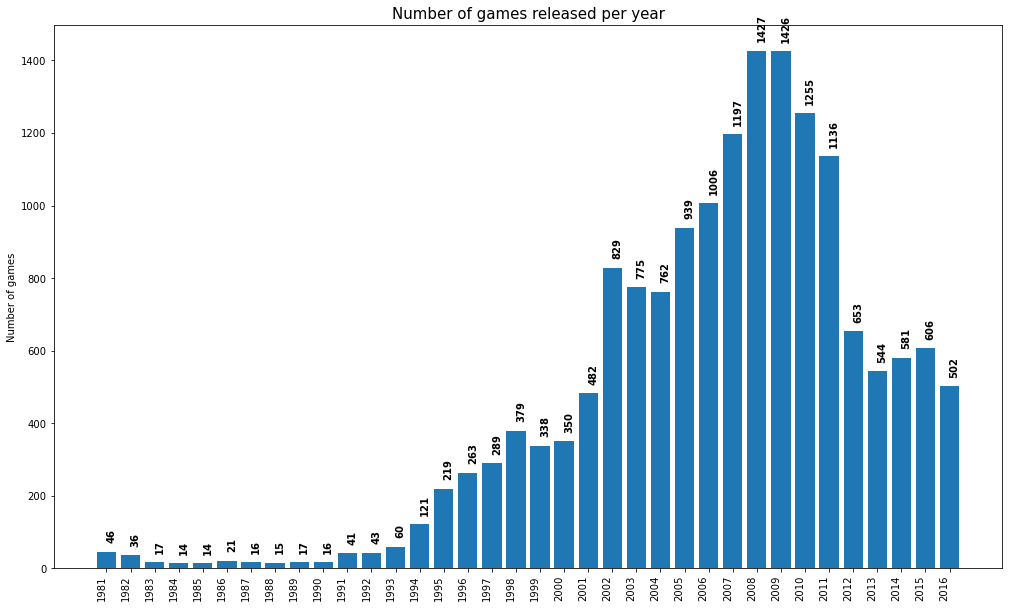

In [10]:
games_per_year = games.pivot_table(index=['year_of_release'], values='name', aggfunc=['count'] )
games_per_year= games_per_year[games_per_year.index>1980]
games_per_year.columns = ['number_of_games']
games_per_year = games_per_year.reset_index()

fig, ax = plt.subplots(figsize = (17, 10))
ax.bar(x=games_per_year.year_of_release, height=games_per_year.number_of_games)
ax.set_ylabel('Number of games')
ax.set_xticks(games_per_year.year_of_release)
ax.set_title('Number of games released per year', size=15)
ax.set_xticklabels(games_per_year.year_of_release, rotation=90, fontdict={'horizontalalignment':'right', 'size': 10})
for row in games_per_year.itertuples():
    x = row.year_of_release
    y=row.number_of_games+30
    s=row.number_of_games
    ax.text(x,y,s, rotation=90, weight='bold')
    


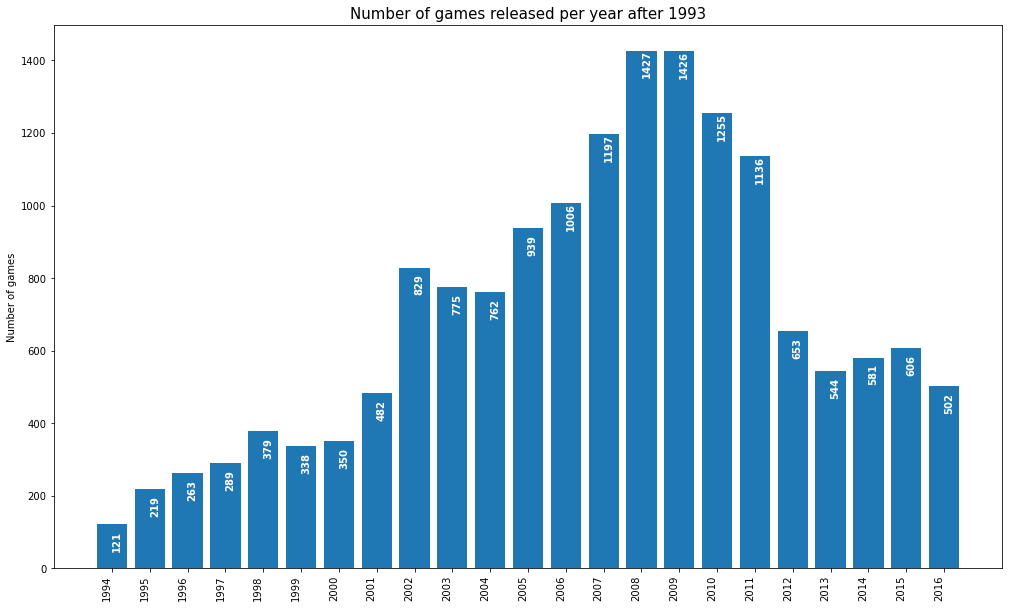

In [11]:
games_per_year_final = games_per_year[games_per_year.number_of_games>100]
games_per_year_final = games_per_year_final.reset_index()

fig2, ax1 = plt.subplots(figsize = (17, 10))
ax1.bar(x=games_per_year_final.year_of_release, height=games_per_year_final.number_of_games)
ax1.set_ylabel('Number of games')
ax1.set_xticks(games_per_year_final.year_of_release)
ax1.set_title('Number of games released per year after 1993', size=15)
ax1.set_xticklabels(games_per_year_final.year_of_release, rotation=90, fontdict={'horizontalalignment':'right', 'size': 10})
for row in games_per_year_final.itertuples():
    x = row.year_of_release
    y=row.number_of_games-70
    s=row.number_of_games
    ax1.text(x,y,s, rotation=90, color='white', weight='bold')

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; vertical-align: middle; padding:20px 0;">The first bar chart shows how many games were released in different years. The zero values (in year column) were not taken into account (as an insignificant outlier). The total count less than 100 (and mostly less than 50) games per year was labeled as statistically insignificant (years 1981-1993). The second bar chart shows the number of games per year in the statistically significant period: 1994-2016. </div>

#### 2. Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [12]:
import math

sales_per_platform = games.pivot_table(index=['platform'], values='total_sales', aggfunc=['sum'])
sales_per_platform = sales_per_platform.reset_index()
                                       
sales_per_platform.sort_values(by=('sum', 'total_sales'), ascending=True, inplace=True)
sales_per_platform.columns = ['platform', 'total_sales']
sales_per_platform['sales_deviation']= (sales_per_platform['total_sales'] - sales_per_platform['total_sales'].mean())/sales_per_platform['total_sales'].std()
sales_per_platform['color'] = ['red' if x<0 else 'green' for x in sales_per_platform['sales_deviation']]


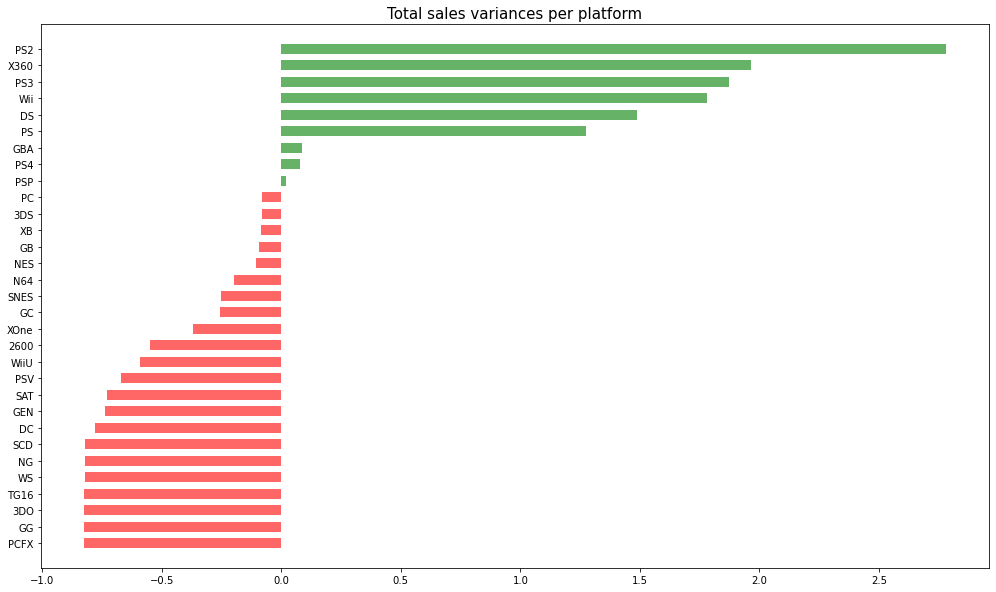

In [13]:
plt.figure(figsize=(17,10))
plt.title("Total sales variances per platform", size=15)
plt.hlines(y=sales_per_platform.platform,xmin=0, xmax=sales_per_platform.sales_deviation, 
           color=sales_per_platform.color, linewidth=10, alpha=0.6)


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; vertical-align: middle; padding:20px 0;">PS2, X360, PS3, Wii and DS are the platforms with the greatest total sales. In general, we may define "green" labeled platforms as successful in total sales, while "red" labeled platforms can be considered less successful. The distributions for each platform were built:</div>

In [14]:
import plotly.express as px

platform_total_sales = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
best_sales_platforms = platform_total_sales.query('platform in ["PS2", "X360", "PS3", "Wii", "DS"] and year_of_release>1980')
fig = px.line (best_sales_platforms, x="year_of_release", y="total_sales", color="platform", 
               title='Total sales distributions per platform')

fig.show()




<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; vertical-align: middle; padding:20px 0;"><strong>Some notes on distributions</strong>: one may notice that  all the platforms with the highest total sales went through the similar scenario: growing dramatically after being released and  shrinking dramatically after the peak sales. One may assume that we deal here with some general drop in total sales in last few years. PS2 and Wii are the undisputed leaders by the peak sales.</div>

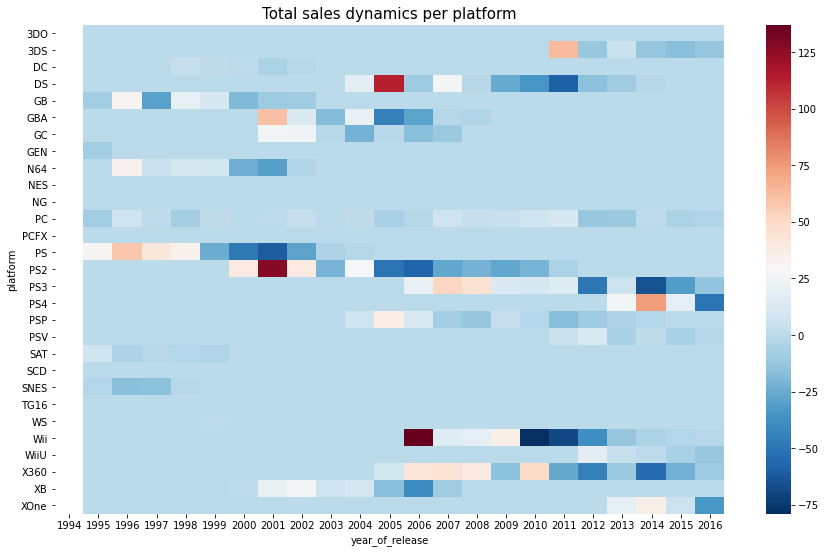

In [15]:
games_final = games[games.year_of_release>1993]
games_year_platform_sales = games_final.pivot_table(index='year_of_release', columns='platform', values=
                                                   'total_sales', aggfunc='sum', fill_value=0)
dynamics = games_year_platform_sales-games_year_platform_sales.shift(+1)

plt.figure(figsize=(15,9))
plt.title('Total sales dynamics per platform', size=15)
sns.heatmap(dynamics.T, cmap='RdBu_r')

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; vertical-align: middle; padding:20px 0;">On the heatmap presented above, one may clearly identify the platforms that <strong>used to be popular but now have zero sales</strong>: DS,  GBA, Wii, XB, PS (PS and PS2 models). Let's look closely at PS series as an example. The release of each new model of PS is characterised by the prominent and fast grow in total sales (just in one year there is a prominent rise). After the impressive rise in sales there is a gradual decrease in total sales which lasts 8-9 years. At the final stage of decrease a new PS model  expectedly gets released.</div>


In [16]:
import statistics

## the function to calculate the number of years before the peak of total sales, after the peak of 
## total sales, and the year of a peak
def grow_shrink_period (df):
    platform = df['platform'].unique()[0]
    length = len(df)
    max_sales = df.total_sales.max()
    grow_count = 0
    shrink_count = 0
    max_year=10000
    last_year_sales = -1
    for row in df.itertuples():
        if (row.total_sales < max_sales):
            grow_count+=1
        if (row.total_sales == max_sales):
            grow_count+=1;
            max_year = row.year_of_release
        if (row.year_of_release > max_year):
            shrink_count+=1;
            grow_count-=1
    
        if(shrink_count+grow_count == length):
            last_year_sales =  row.total_sales
    return ([platform, grow_count, shrink_count])


platform_total_sales_final = platform_total_sales.query(' year_of_release != 0')
platforms = platform_total_sales_final.platform.unique() 

platform_arrays = []
grow_array = []
shrink_array = []
for p in platforms:
    slice_platform = platform_total_sales_final.query('platform == @p ')
    platform_data = grow_shrink_period(slice_platform)
    platform_arrays.append(platform_data)
    grow_array.append(platform_data[1])
    shrink_array.append(platform_data[2])
            
print(platform_arrays) 
print(grow_array)        
print(shrink_array) 

print('\nThe grow of total sales: the average number of years:')
print(statistics.mean(grow_array))
print('The grow of total sales: the median of years:')
print(statistics.median(grow_array))
print('The shrink of total sales: the average number of years:')
print(statistics.mean(shrink_array))
print('The shrink of total sales: the median of years:')
print(statistics.median(shrink_array))


        

[['2600', 2, 8], ['3DO', 2, 0], ['3DS', 1, 5], ['DC', 3, 4], ['DS', 5, 6], ['GB', 2, 11], ['GBA', 5, 3], ['GC', 2, 5], ['GEN', 3, 2], ['GG', 1, 0], ['N64', 4, 3], ['NES', 3, 9], ['NG', 2, 2], ['PC', 21, 5], ['PCFX', 1, 0], ['PS', 5, 5], ['PS2', 5, 7], ['PS3', 6, 5], ['PS4', 3, 1], ['PSP', 3, 9], ['PSV', 2, 4], ['SAT', 2, 4], ['SCD', 1, 1], ['SNES', 4, 6], ['TG16', 1, 0], ['WS', 2, 1], ['Wii', 4, 7], ['WiiU', 3, 2], ['X360', 6, 6], ['XB', 5, 4], ['XOne', 3, 1]]
[2, 2, 1, 3, 5, 2, 5, 2, 3, 1, 4, 3, 2, 21, 1, 5, 5, 6, 3, 3, 2, 2, 1, 4, 1, 2, 4, 3, 6, 5, 3]
[8, 0, 5, 4, 6, 11, 3, 5, 2, 0, 3, 9, 2, 5, 0, 5, 7, 5, 1, 9, 4, 4, 1, 6, 0, 1, 7, 2, 6, 4, 1]

The grow of total sales: the average number of years:
3.6129032258064515
The grow of total sales: the median of years:
3
The shrink of total sales: the average number of years:
4.064516129032258
The shrink of total sales: the median of years:
4


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; vertical-align: middle; padding:20px 0;">As one may see, it takes 3 and a half years in average for each platform to reach its peak of sales
and 4 years to  fade from the market.</div>

#### 3.Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; vertical-align: middle; padding:20px 0;"><p>According to the bar chart representing the number of games released per year the period before year 1994 is statistically insignificant due to the low number of games (less than 100).</p>
<p>Moreover, the heatmap makes it possible to narrow the period even more and to take into consideration the platforms which are still relevant on market and which were released after 2000 (most of platforms which had been on market year earlier have already dissapeared).</p>
    
<p>We may assume that the data on 2016 is incomplete so it is reasonable also to drop it for more accurate analysis</p>    
<p>Finally, it seems reasonable not to include 269 rows with NaN values in year_of_release in order ro avoid dealing with outliers while calculating mean values.</p>
<p><strong>The final data slice to work with will be:</strong></p></div>

In [17]:
games_final = games.query('year_of_release>=2000 and year_of_release<2016 and year_of_release != 0')
print(len(games_final))

13968


#### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [18]:
total_sales = games_final.groupby(['platform'])['total_sales'].sum().reset_index().sort_values('total_sales',
                                                                                               ascending=False)
games_final_2016 = games_final.query('year_of_release in [2012, 2013, 2015,2016]')
total_sales_2016 = games_final_2016.groupby(['platform'])['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False)

print('Total sales per platform for the whole period: 2000-2016')
display(total_sales)
print('Total sales per platform for the period: 2012-2016')

display(total_sales_2016)

shrinking = []
for platform in total_sales['platform']:
    if ((platform not in games_final_2016['platform'].unique())):
        shrinking.append(platform)
 
print('Platforms which faded from the market')
print(shrinking)
    

Total sales per platform for the whole period: 2000-2016


platform  total_sales
9       PS2      1233.56
17     X360       959.72
10      PS3       927.74
15      Wii       891.00
2        DS       802.76
4       GBA       312.88
12      PSP       289.53
18       XB       251.57
11      PS4       244.89
0       3DS       242.67
7        PC       200.47
5        GC       196.73
8        PS       140.70
19     XOne       133.17
16     WiiU        77.59
13      PSV        49.56
6       N64        37.30
3        GB        29.00
1        DC         7.41
14       WS         0.96

Total sales per platform for the period: 2012-2016


platform  total_sales
3       PS3       237.43
9      X360       200.28
4       PS4       144.89
0       3DS       135.71
10     XOne        79.10
8      WiiU        55.56
2        PC        44.12
6       PSV        33.03
7       Wii        31.44
1        DS        12.55
5       PSP        10.95

Platforms which faded from the market
['PS2', 'GBA', 'XB', 'GC', 'PS', 'N64', 'GB', 'DC', 'WS']


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; vertical-align: middle; padding:20px 0;"><p>Based on the tables presented above and the heatmap from the previous analysis step I need to mention:</p>
<p>1. The five platforms leading in total sales for the whole period are: PS2, X360, PS3, Wii, DS	</p>
<p>2. However, it is significant to notice that the platforms which are leading in sales in last
few years are different: PS3, PS4, X360, 3DS , XOne, Wii. It is quite reasonable (for instance, the PS3 and PS4 are more popular (as being released later) today rather than the previous sales leader PS2) </p>
<p><strong>The platforms which faded from the market</strong> for the last 4 years: 'PS2', 'GBA', 'XB', 'GC', 'PS', 'N64', 'GB', 'DC', 'WS' </p>
<p>To sum up, <strong>potentially profitable platforms</strong> for 2017 are: PS3, PS4 (instead of PS2), X360, 3DS, XOne, WiiU (instead of Wii)</p></div>

#### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

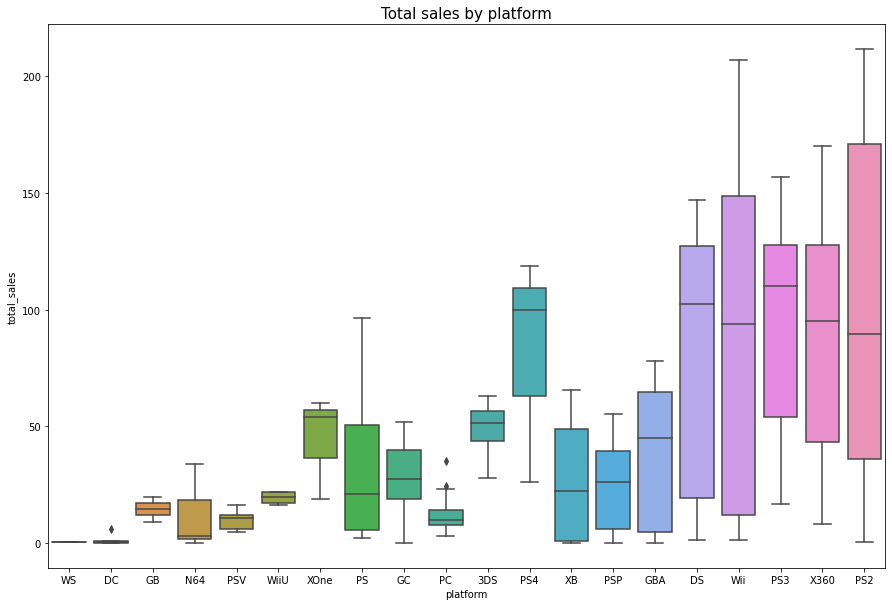

In [19]:
total_sales_per_year = games_final.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
ordered = games_final.groupby(['platform'])['total_sales'].sum().sort_values().sort_values().reset_index()['platform']

plt.figure(figsize=(15,10))
plt.title('Total sales by platform', size=15)
sns.boxplot(x='platform', y='total_sales', data = total_sales_per_year, order=ordered)

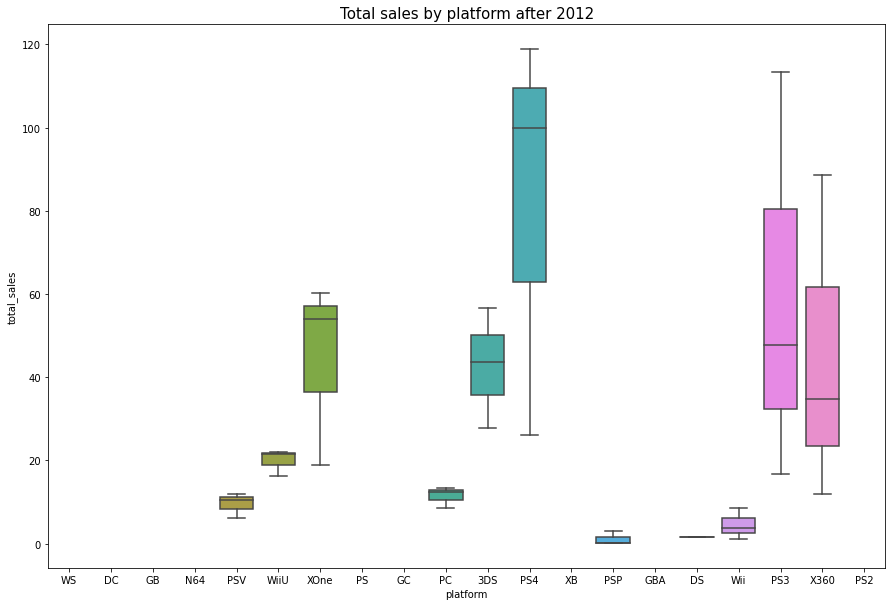

In [20]:
total_sales_per_year = games_final.query('year_of_release >2012').groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
ordered = games_final.groupby(['platform'])['total_sales'].sum().sort_values().sort_values().reset_index()['platform']

plt.figure(figsize=(15,10))
plt.title('Total sales by platform after 2012', size=15)
sns.boxplot(x='platform', y='total_sales', data = total_sales_per_year, order=ordered)

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; vertical-align: middle; padding:20px 0;">The two major aspects which one should pay attention to analysing the current boxplots (in aim to define and compare potentially profitable platforms for 2017) are the skewness of each boxplot and its median value level. For instance, let's look at and compare the potentially profitable PS series (PS2, PS3, PS4). Despite the fact that PS2 is an absolute leader in sales for the whole period (2000-2016), its sales are shrinking in last 5 years (according to the tables displayed above), so it is reasonable to consider the newly released PS3 and PS4. One may notice that the boxplot of total sales of PS3 is negatively skewed with median value higher than its mean. In contrast, the PS4 total sales are normally destributed (and the median value is almost equal to the median of PS2, a sales leader). Therefore, one may assume that PS4 sales are more stable and predictable than the sales of PS3. 

<p>The second set of boxplots shows how the total sales dynamics changed starting 2013. As was assumed previously, PS4 reveals itself as much more profitable than PS3. In general, previous leaders were replaced by new ones, several platforms faded from the market</p></div>   

#### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

PS4: Correlation between total sales and critic score: 0.4318482049982005


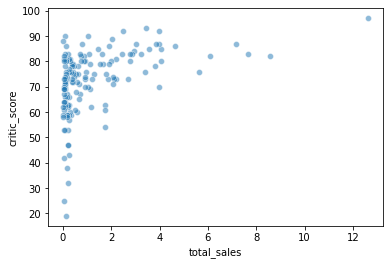

In [21]:
# analysis of critic_score and total sales correlation (PS4)
games_ps4 = games_final.query('platform == "PS4" and critic_score != 0')
sns.scatterplot(data=games_ps4, x="total_sales", y="critic_score", alpha=0.5)
print("PS4: Correlation between total sales and critic score: {}".format(games_ps4['total_sales'].corr(games_ps4['critic_score'])))


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; vertical-align: middle; padding:20px 0;">First, the correlation between total_sales and critic_score was explored for PS4.
For accuracy of analysis, the NaN (zero) values in critic_score column were dropped. There is a little positive correlation (0.4). According to the plot, the higher the critic score is, the bigger chance is that the total_sales will exceed 2 millions.
</div>

PS4: Correlation between total sales and critic score (updated): 0.48080987627978555


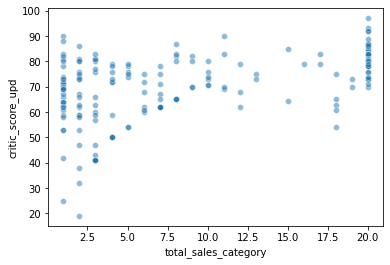

In [22]:
# analysis of critic_score_upd and total_sales_category correlation (PS4)
games_ps4_upd = games_final.query('platform == "PS4" and critic_score_upd != 0')
sns.scatterplot(data=games_ps4_upd, x="total_sales_category", y="critic_score_upd", alpha=0.5)

print("PS4: Correlation between total sales and critic score (updated): {}".format(games_ps4_upd['total_sales_category'].corr(games_ps4_upd['critic_score_upd'])))

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; vertical-align: middle; padding:20px 0;">Second, the correlation between total_sales_category and critic_score_upd (with filled values) was explored for PS4. For accuracy of analysis, the NaN (zero) values in critic_score_upd column were dropped. A bit more explicit correlation was found (0.48). According to the plot, the higher the critic score is, the bigger chance is that the total_sales will exceed 2 millions (category 20 on the plot).
</div>

PS4: Correlation between total sales and user score: 0.024230836706244357


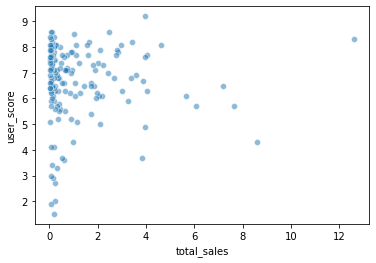

In [23]:
# analysis of user_score and total sales correlation (PS4)
games_ps4_user = games_final.query('platform == "PS4" and user_score != 0')
sns.scatterplot(data=games_ps4_user, x="total_sales", y="user_score", alpha=0.5)

print("PS4: Correlation between total sales and user score: {}".format(games_ps4_user['total_sales'].corr(games_ps4_user['user_score'])))

PS4: Correlation between total sales and user score (updated): 0.10626777259230219


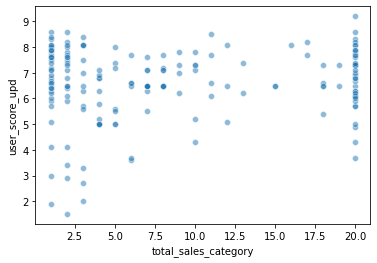

In [24]:
# analysis of user_score_upd and total sales_category correlation (PS4)
games_ps4_user_upd = games_final.query('platform == "PS4" and user_score_upd != 0')
sns.scatterplot(data=games_ps4_user_upd, x="total_sales_category", y="user_score_upd", alpha=0.5)

print("PS4: Correlation between total sales and user score (updated): {}".format(games_ps4_user_upd['total_sales_category'].corr(games_ps4_user_upd['user_score_upd'])))


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; vertical-align: middle; padding:20px 0;"> No explicit correlations were found between total sales and user scores (both original and after filling the missing values)</div>

#### Keeping your conclusions in mind, compare the sales of the same games on other platforms.

Wii:
Critic score and total sales correlation: 0.44
Critic score and total sales correlation: 0.2
Size of data slice: 790
DS:
Critic score and total sales correlation: 0.38
Critic score and total sales correlation: 0.18
Size of data slice: 1000
X360:
Critic score and total sales correlation: 0.58
Critic score and total sales correlation: 0.23
Size of data slice: 985
PS3:
Critic score and total sales correlation: 0.6
Critic score and total sales correlation: 0.29
Size of data slice: 934
PS2:
Critic score and total sales correlation: 0.47
Critic score and total sales correlation: 0.2
Size of data slice: 1542
GBA:
Critic score and total sales correlation: 0.25
Critic score and total sales correlation: 0.073
Size of data slice: 542
PS4:
Critic score and total sales correlation: 0.46
Critic score and total sales correlation: 0.1
Size of data slice: 183
3DS:
Critic score and total sales correlation: 0.49
Critic score and total sales correlation: 0.31
Size of data slice: 213
XB:
Critic score 

C:\Users\jadir\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\jadir\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning:

divide by zero encountered in true_divide



Critic score and total sales correlation: nan
Critic score and total sales correlation: nan
Size of data slice: 1


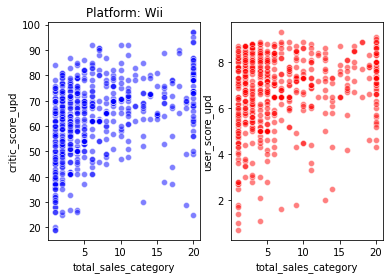

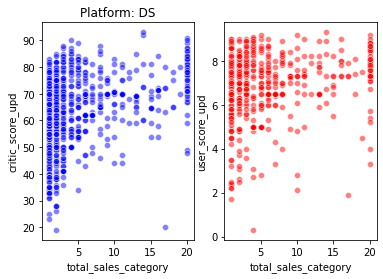

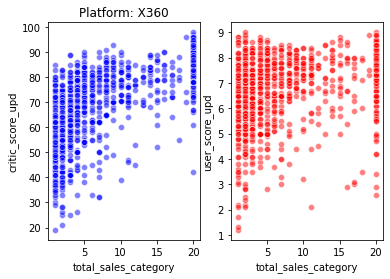

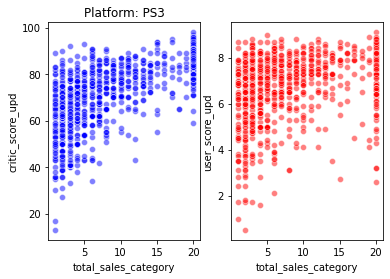

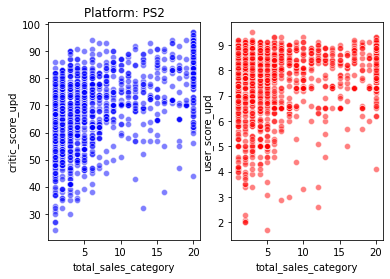

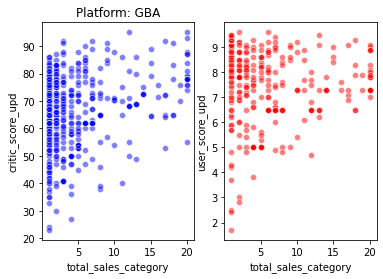

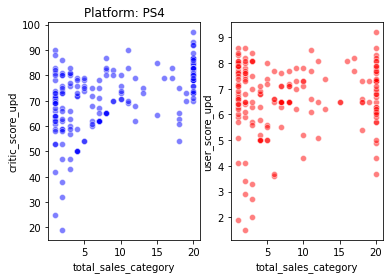

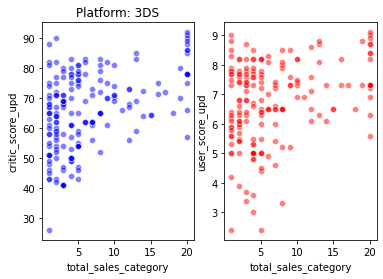

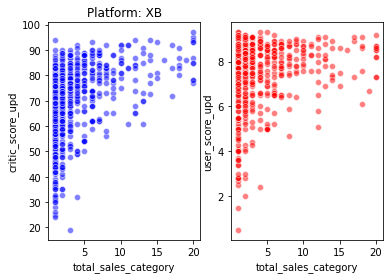

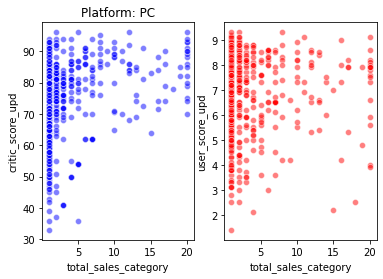

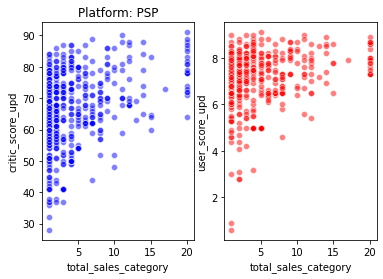

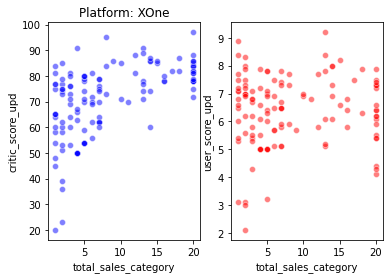

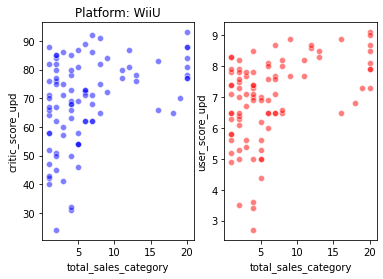

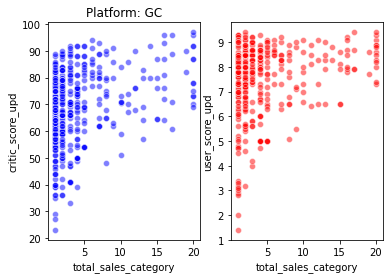

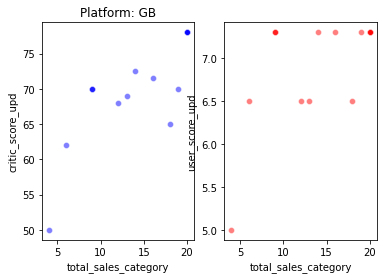

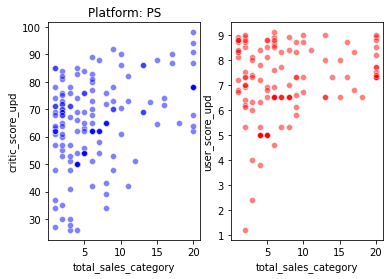

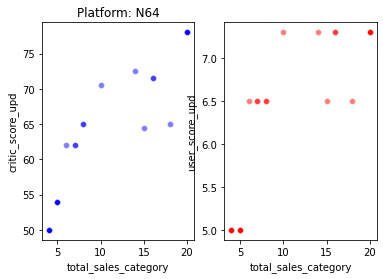

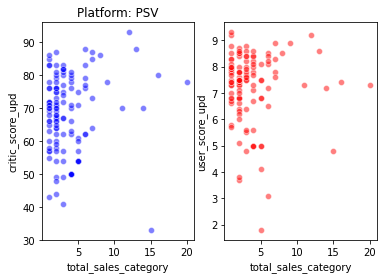

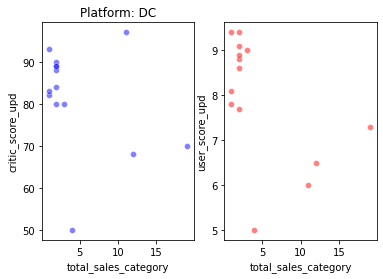

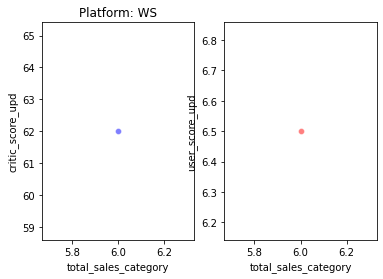

In [25]:
def sales_score_corr(slice):
    fig, ax =plt.subplots(1,2)
    sns.scatterplot(data=slice, x="total_sales_category", y="critic_score_upd", alpha=0.5, 
                    color="blue", ax=ax[0]).set_title('Platform: {}'.format(slice['platform'].unique()[0]))
    sns.scatterplot(data=slice, x="total_sales_category", y="user_score_upd", alpha=0.5, 
                    color="red", ax=ax[1])

    print("Critic score and total sales correlation: {:.2}".format(slice['total_sales_category'].corr(slice['critic_score_upd'])) )
    print("Critic score and total sales correlation: {:.2}".format(slice['total_sales_category'].corr(slice['user_score_upd'])))
    print('Size of data slice: {}'.format(len(slice)))
    
platforms = games_final['platform'].unique()
for p in platforms:
    platform = p
    slice = games_final.query('platform == @platform and user_score_upd != 0 and critic_score_upd != 0')
    print(platform+':')
    sales_score_corr(slice)
    
    

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; vertical-align: middle; padding:20px 0;"><p>In general, the analysis reveals the explicit  positive correlation between critic score and total sales (the highest is for: X360 (critics score: 0.58), PS3(critic score: 0.6)).</p> 

<p>The analysis does not reveal any correlation between user score and total sales.</p>

<p>Due to the small size of the data slice, the following results were not included into account: GB(critic score:0.79, user_score: 0.57), N64(critic score: 0.93, user score: 0,87)</p></div>


#### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

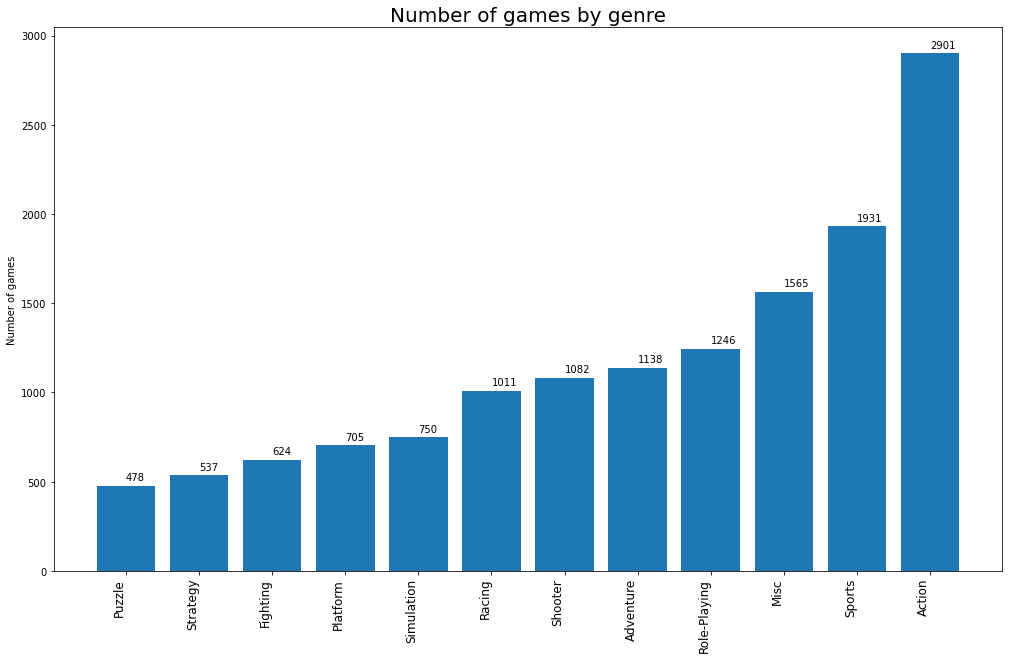

In [26]:
genres = games_final.pivot_table(index=['genre'], values='name', aggfunc=['count'] )
genres.columns = ['number_of_games']
genres = genres.sort_values('number_of_games').reset_index()

fig, ax = plt.subplots(figsize = (17, 10))
ax.set_title('Number of games by genre', size=20)
ax.bar(x=genres.genre, height=genres.number_of_games)
ax.set_ylabel('Number of games')
ax.set_xticks(genres.genre)
ax.set_xticklabels(genres.genre, rotation=90, fontdict={'horizontalalignment':'right', 'size': 12})
for row in genres.itertuples():
    x = row.genre
    y=row.number_of_games+30
    s=row.number_of_games
    ax.text(x,y,s)

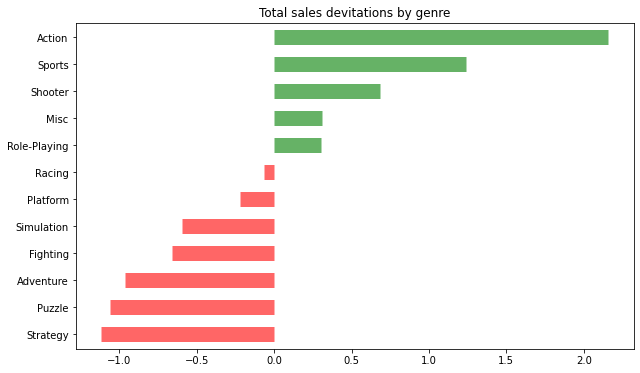

In [27]:
sales_per_genre = games_final.pivot_table(index=['genre'], values='total_sales', aggfunc=['sum'])
sales_per_genre = sales_per_genre.reset_index()
                                       
sales_per_genre.sort_values(by=('sum', 'total_sales'), ascending=True, inplace=True)
sales_per_genre.columns = ['genre', 'total_sales']
sales_per_genre['sales_deviation']= (sales_per_genre['total_sales'] - sales_per_genre['total_sales'].mean())/sales_per_genre['total_sales'].std()
sales_per_genre['color'] = ['red' if x<0 else 'green' for x in sales_per_genre['sales_deviation']]

plt.figure(figsize=(10,6))
plt.title('Total sales devitations by genre')
plt.hlines(y=sales_per_genre.genre,xmin=0, xmax=sales_per_genre.sales_deviation, 
           color=sales_per_genre.color, linewidth=15, alpha=0.6)


Text(0.5, 1.0, 'Genre distribution for leading platforms by 2016')

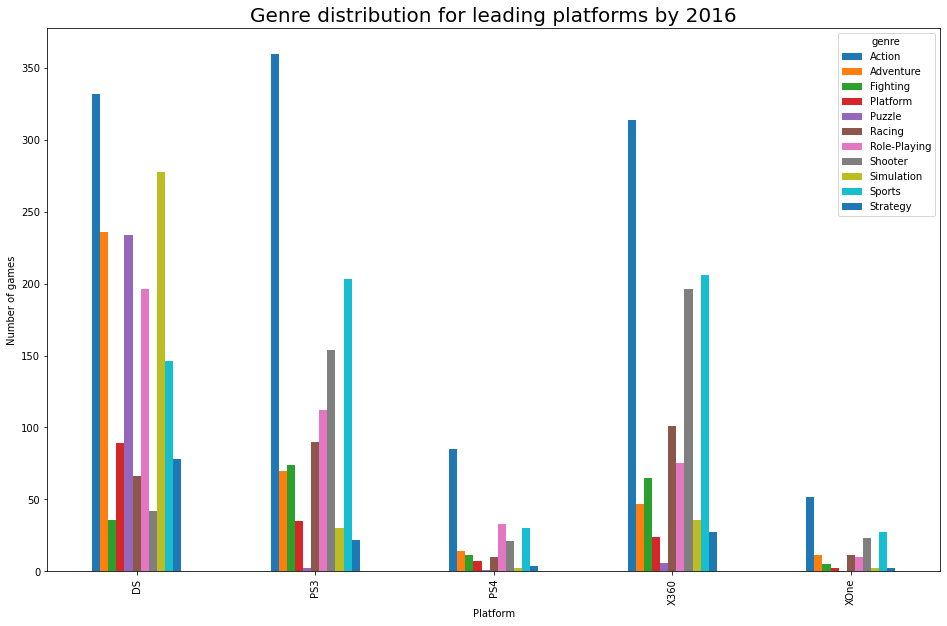

In [28]:
leading_platforms=['PS3', 'X360', 'PS4', 'DS', 'XOne']

genres_platform_leaders = games_final.query('platform in @leading_platforms and genre != "Misc"')

genres_platform_leaders.groupby(['platform', 'genre'])['name'].count().unstack().plot.bar(figsize = (16, 10))
plt.xlabel('Platform', size=10)
plt.ylabel('Number of games', size=10)
plt.title("Genre distribution for leading platforms by 2016", size=20)

Text(0.5, 1.0, 'Total sales for different genres for leading platforms by 2016')

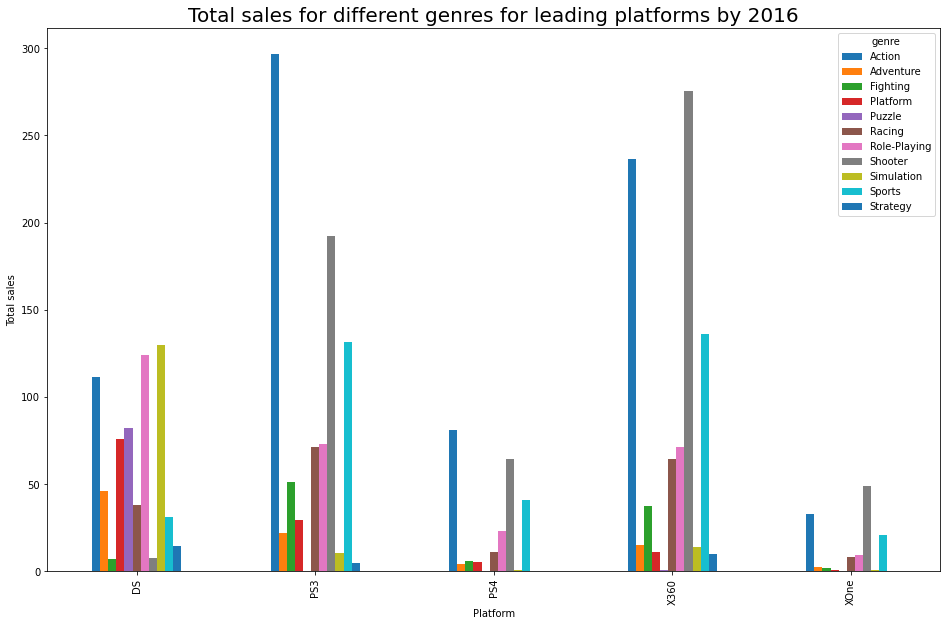

In [29]:
genres_platform_leaders.groupby(['platform', 'genre'])['total_sales'].sum().unstack().plot.bar(figsize = (16, 10))
plt.xlabel('Platform', size=10)
plt.ylabel('Total sales', size=10)
plt.title("Total sales for different genres for leading platforms by 2016", size=20)

<strong>Conclusions regarding genre distribution:</strong>
<ol>
    <li>Action Sports, Role-Playing, Shooter are the leaders in genre both by number of games released and total sales</li>
    <li>Puzzle, Strategy are the least popular genres both by number of games released and total sales</li>
    <li>The genre distribution (by number of games) differs for each platform leading in sales on the market by 2016.</li>
    <li>It is interesting, that in spite of the high number of adventure games released, adventure genre reveals itself as unprofitable in general</li>
    <li>Action genre is among 3 leaders in total sales in by the total number of games released regardles the platform. Shooter and sports genres are among new leaders in majority of leading platforms by 2016</li>
    </ol>

### <a class="anchor" id="chapter4">Step IV. USER PROFILE FOR EACH REGION</a>


#### For each region (NA, EU, JP), determine: the top five platforms. Describe variations in their market shares from region to region.

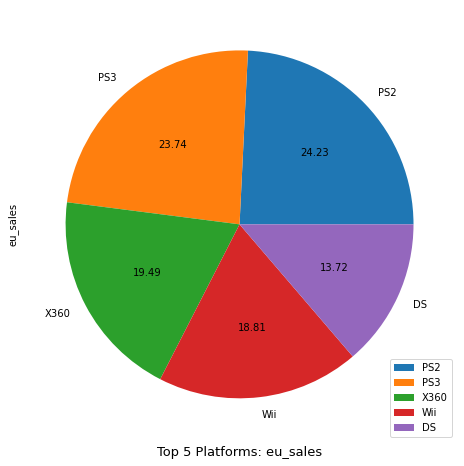

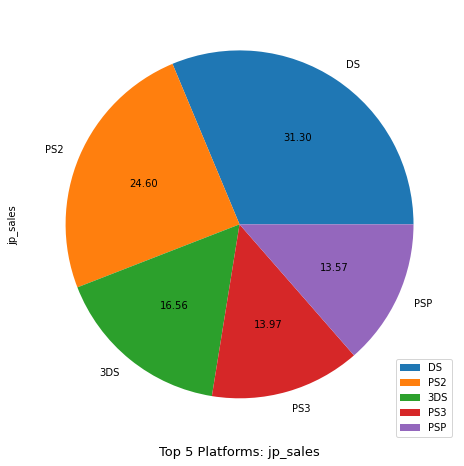

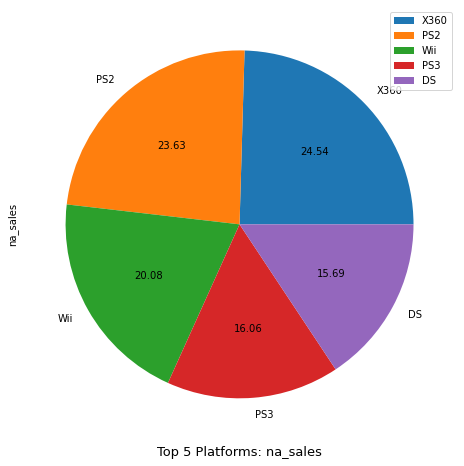

In [30]:
import plotly.express as px

platforms_by_regions = games_final.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc=sum)

for column in platforms_by_regions.columns:
    games_final.groupby(['platform'])[column].sum().reset_index().sort_values(column, ascending=False).head().set_index('platform').plot.pie(subplots=True, figsize=(8, 8), autopct='%.2f',)
    plt.xlabel('Top 5 Platforms: {}'.format(column), size=13)


In [31]:
print("MARKET SHARES:")
for column in platforms_by_regions.columns:
    
    print("{} holds: ~{:0.1%} of market share".format(column.split('_')[0], games_final[column].sum()/games_final['total_sales'].sum()))


MARKET SHARES:
eu holds: ~28.9% of market share
jp holds: ~11.3% of market share
na holds: ~49.6% of market share


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; vertical-align: middle; padding:20px 0;"><p>EU and NA regions have the same top 5 platforms: PS2, PS3, X360, Wii, DS. However, there are slight differences in distributions in regions mentioned. One should notice that EU region holds the largest market share - almost the half of total sales all over the world (EU holds only 29 percents of market share). </p>
<p>JP region has PSP platform within 5 top platforms (instead X360). JP region holds the smakkest market share - only 11 percent of total sales.</p></div>


#### The top five genres. Explain the difference.


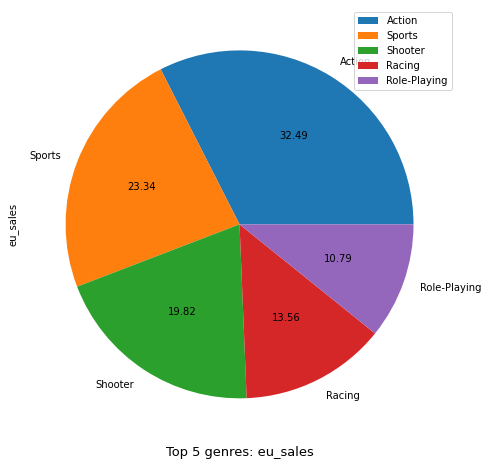

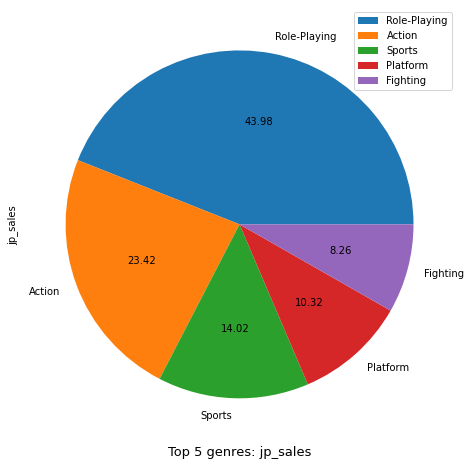

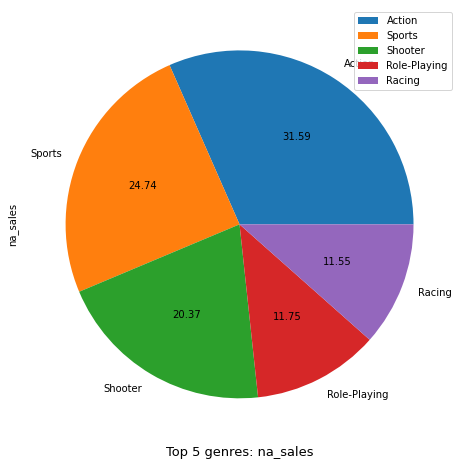

In [32]:
for column in platforms_by_regions.columns:
    games_final.query('genre != "Misc"').groupby(['genre'])[column].sum().reset_index().sort_values(column, ascending=False).head().set_index('genre').plot.pie(subplots=True, figsize=(8, 8), autopct='%.2f',)
    plt.xlabel('Top 5 genres: {}'.format(column), size=13)

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; vertical-align: middle; padding:20px 0;"><p>EU and NA regions have the same top 5 genres (action, sports, shooter, role playing, racing) and similar distribution of regional sales between different genres.</p>
    
<p>JP region differs from the rest of the world both in the top 5 genres set and in distribution. First, almost 44 percent of JP sales are concentrated in role-playing segment (versus Action segment in NA and EU that occupies ~31-32 percent). Second, there are Platform and Fighting segments among top 5 genres (versus racing and shooter segments in NA and EU).</p></div>

#### Do ESRB ratings affect sales in individual regions?

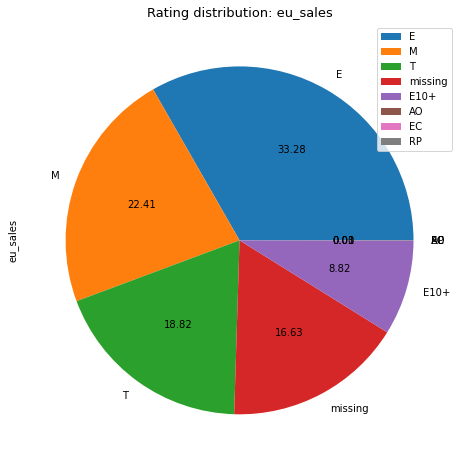

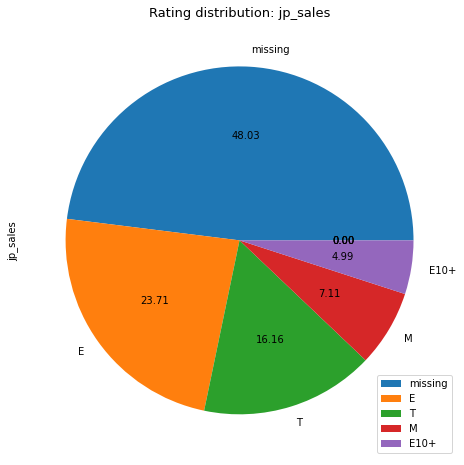

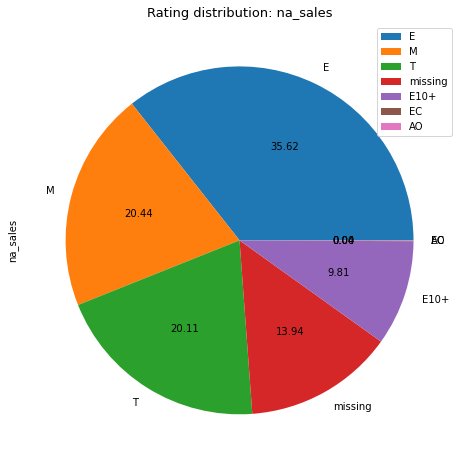

In [33]:
for column in platforms_by_regions.columns:
    games_final.groupby(['rating'])[column].sum().reset_index().sort_values(column, ascending=False).set_index('rating').plot.pie(subplots=True, figsize=(8, 8), autopct='%.2f',)
    plt.title('Rating distribution: {}'.format(column), size=13)

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; vertical-align: middle; padding:20px 0;">The category one should pay attention to is the sales without any rating ("missing" category).One may notice that almost the half of total sales in JP region are without any rating (versus ~17% in EU and ~14% in NA). We can conclude that in NA and EU regions rating does affect the sales, while in JP region it does not. </div>  

### <a class="anchor" id="chapter5">Step 5. TEST OF HYPOTHESES</a>

#### Average user ratings of the Xbox One and PC platforms are the same.

In [34]:
games_final['user_score_upd'] = games_final['user_score_upd'].fillna(0)
xbox_slice = games_final.query('platform == "XOne" and user_score_upd != 0')
pc_slice = games_final.query('platform == "PC" and user_score_upd != 0')

sample_1 = xbox_slice['user_score_upd']
sample_2 = pc_slice['user_score_upd']

std_1 = np.std(sample_1)
std_2 = np.std(sample_2)
print("The Null HYPOTHESIS: Average user ratings of the Xbox One and PC platforms are equal")

print('Standard deviations in two slices: ', std_1, std_2)
print(st.levene(sample_1, sample_2, center='mean'))


alpha = .01
results = st.ttest_ind(
        sample_1, 
        sample_2, equal_var = True)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

<ipython-input-34-467756a9b31c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The Null HYPOTHESIS: Average user ratings of the Xbox One and PC platforms are equal
Standard deviations in two slices:  1.2603883743286133 1.4814397096633911
LeveneResult(statistic=4.609247324921861, pvalue=0.032086015590584084)
p-value:  1.623102529001307e-06
We reject the null hypothesis


#### Average user ratings for the Action and Sports genres are different.

In [37]:
games_final['user_score_upd'] = games_final['user_score_upd'].fillna(0)
action_slice = games_final.query('genre == "Action" and user_score_upd != 0')
sports_slice = games_final.query('genre == "Sports" and user_score_upd != 0')

sample_1 = action_slice['user_score_upd']
sample_2 = sports_slice['user_score_upd']

std_1 = np.std(sample_1)
std_2 = np.std(sample_2)
print("The Null HYPOTHESIS: Average user ratings for the Action and Sports genres are equal.")

print('Standard deviations in two slices: ', std_1, std_2)
print(st.levene(sample_1, sample_2, center='mean'))


alpha = .05
results = st.ttest_ind(
        sample_1, 
        sample_2, equal_var = True)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

The Null HYPOTHESIS: Average user ratings for the Action and Sports genres are equal.
Standard deviations in two slices:  1.4085969924926758 1.5470964908599854
LeveneResult(statistic=13.100943898845445, pvalue=0.0002999981395613708)
p-value:  0.3836685494165414
We can't reject the null hypothesis


<ipython-input-37-0c884a42a2a7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### <strong>Test of hypotheses: conclusions</strong>


<p><strong>The null hypothesis #1</strong>:  Average user ratings of the Xbox One and PC platforms are equal.</p>
<p><strong>The alternative hypothesis #1</strong>: Average user ratings of the Xbox One and PC platforms differ</p>
<hr>  

<p><strong>The null hypothesis #2</strong>:  Average user ratings for the Action and Sports genres are equal.</p>
<p><strong>The alternative hypothesis #2</strong>: Average user ratings for the Action and Sports genres differ.</p>
<hr>  


In both cases I supposed that the average user scores in different slices will differ, that is why in my null hypotheses I assumed the opposite - that the user scores equal each other - in hope to reject it.

To set the criteria for testing the hypotheses I stated the level of significance for a test - 1% (first case) and 5%(second case).

<p>In the case of the first hypothesis, it was rejected (even with level of significance 1%). In other words, the user scores do differ from each other for XBox One and PC platforms. That means that the original hypothesis (which is equal to the null hypethesis) is rejected. </p>

<p>In the second case, I did not succeed to reject the hypothesis (even with 10% level of significance). So we cannot suggest something about whether the 2nd hypothesis is true or not.</p>

<p>In both cases I used Leene's Test in order to recheck whether I can consider the variances as equal</p>

<p>I both case both user_score and user_score_upd (with filled missing values) columns were checked and the same results were received.</p>

###  <a class="anchor" id="chapter6">Step VI. GENERAL CONCLUSION</a>

<p>During my analysis of the data I found out that there are three crutial parameters to determine whether a game succeeds or not:</p>
<ol>
<li><strong>Platform</strong>
Potentially profitable platforms for 2017 are: PS3, PS4, X360, 3DS, XOne, WiiU. The platforms which faded from the market for the last 4 years and therefore cannot be considered profitable: 'PS2', 'GBA', 'XB', 'GC', 'PS', 'N64', 'GB', 'DC', 'WS'. Speaking about popular series of platforms (for instance, PS, XBOX, Wii) it is significant to track possible future releases of new models in order to replan advertising compaigns in favor of the most upgraded model. Moreover, it is important to take into account critic scores which reveal slight positive correlations with total sales for majority of platforms. </li>

<li><strong>Genre</strong>
Action Sports, Role-Playing, Shooter are the leaders in genre both by number of games released and total sales. Puzzle, Strategy are the least popular genres both by number of games released and total sales. In order to plan advertising compaign for a particular game the genre parameter should be always considered together with platform a game is released on due to the fact that total sales distribution differs for each platform leading in sales on the market by 2016. Action, shooter and sports  can be consisired as win-win genres regardles the platform.</li>

<li><strong>Region.</strong>
The total sales dynamics differs dramaticly in JP region and the rest of the world. The JP region reveals special preferences in both platforms (DS versus PS3 or X360 in the rest of the world) and genres (shift to role-playing for instance instead of  Action as an absolute in the rest of the world).</li>
</ol>
<p><strong>Additional note</strong>: the forth parameter - <strong>ESRB rating</strong> - is relevant only for EU and NA regions (the leaders are: M, E, T). In JP region ESRB ratings in general do not affect the sales.</p>